# mus musculus

In [18]:
im_size = 1024 // 8
num_tiles = 4

tile_size = im_size//num_tiles

num_samples = (im_size/tile_size)**2*180*4
d = tile_size**2*6
print(im_size, tile_size)
print(num_samples, d)
print(num_samples/d)
for i in range(0,im_size,tile_size):
    print(i)

128 32
11520.0 6144
1.875
0
32
64
96


In [9]:
from skimage import io
import napari
import numpy as np

In [13]:
im_phall = io.imread("/Users/thomasathey/Documents/shavit-lab/fraenkel/data/mus_musculus/MP6843_img_full/F01_120w1.TIF")
im_dapi = io.imread("/Users/thomasathey/Documents/shavit-lab/fraenkel/data/mus_musculus/MP6843_img_full/F01_120w2.TIF")
im_rgb = np.stack([np.zeros_like(im_dapi), im_phall, np.zeros_like(im_dapi)], axis=-1)
seg = io.imread("/Users/thomasathey/Documents/shavit-lab/fraenkel/data/mus_musculus/MP6843_seg/F01_120_GT_01.tif")
seg = np.amax(seg, axis=-1)

viewer = napari.Viewer()
viewer.add_image(im_rgb, scale=[0.31,0.31])
viewer.add_labels(seg, scale=[0.62,0.62])

<Labels layer 'seg' at 0x1820130d0>

In [6]:
seg.shape

(520, 696, 3)

In [7]:
im.shape

(1040, 1392)

# format ims

In [20]:
from pathlib import Path
import numpy as np
from skimage import io

In [36]:
def name_to_info_e1(name):
    c = name[-1]
    s = int(name[-5:-2])
    f = (s-1) % 3 + 1

    if s < 31:
        row = 'B'
    elif s < 61:
        row = 'C'
    elif s < 91:
        row = 'D'
    elif s < 118:
        row = 'E'
    elif s < 145:
        row = 'F'
    else:
        row = 'G'

    if s < 118:
        if s >= 61 and s < 118:
            s -= 60
        ladder = list(np.arange(2, 12, 1)) + list(np.arange(11, 1, -1))
        idx = (s - 1) // 3
        col = ladder[idx]
    else:
        s -= 117
        ladder = list(np.arange(3, 12, 1)) + list(np.arange(11, 2, -1))
        idx = (s - 1) // 3
        col = ladder[idx]

    return row, col, f, c

def name_to_info_e1b(name):
    c = name[-1]
    s = int(name[-3])
    f = (s-1) % 3 + 1

    if s < 4:
        row = 'E'
    elif s < 7:
        row = 'F'
    else:
        row = 'G'

    col = 2

    return row, col, f, c

def name_to_info_e2(name):
    c = name[-1]
    s = int(name[-5:-2])
    f = (s-1) % 3 + 1

    if s < 31:
        row = 'B'
    elif s < 61:
        row = 'C'
    elif s < 91:
        row = 'D'
    elif s < 121:
        row = 'E'
    elif s < 151:
        row = 'F'
    else:
        row = 'G'

    unit = s - ((s - 1) // 60) * 60
    ladder = list(np.arange(2, 12, 1)) + list(np.arange(11, 1, -1))
    idx = (unit - 1) // 3
    col = ladder[idx]

    return row, col, f, c


In [43]:
dir = Path("/Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/tifs/Experiment3_DB_AD_unmixed_zprojection")
out_dir = Path("/Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/processed")

# list all tif files in dir
tifs = list(dir.glob("*.tif"))


e = '3'

for tif in tifs:
    row, col, f, c = name_to_info_e2(tif.stem)

    im = io.imread(tif)
    im = np.amax(im, axis=-1)

    fname = f"e{e}_w{row}{col}_f{f}_c{c}.tif"

    io.imsave(out_dir / fname, im)


/var/folders/gy/jk_d3cx54vj18w9sm6x3sg_80000gn/T/ipykernel_58728/1671311751.py:18: UserWarning: /Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/processed/e3_wF9_f2_c4.tif is a low contrast image
  io.imsave(out_dir / fname, im)


In [22]:
import numpy as np 
from skimage import io
im = np.load("/Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/als_v_control_2/train/e1_wB2_f1.npy") 

im = np.moveaxis(im, [0,1,2], [2,0,1])
im.shape

io.imsave("/Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/als_v_control_2/test.tif", im)

In [38]:
from cell_paint_seg.utils import get_id_to_path
from pathlib import Path

def name_to_id(name):
    id = "_".join(name.split("_")[:3])
    return id

out_dir = Path("/Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/tifs_3channel")

id_to_path = get_id_to_path("/Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/processed", id_from_name=name_to_id, tag=".tif")

print(len(list(id_to_path.keys())))
for id, paths in id_to_path.items():
    out_path = out_dir / f"{id}.tif"
    ims = [io.imread(p) for p in paths]
    ims = [ims[3], ims[4], ims[1]]
    im = np.stack(ims, axis=-1)
    io.imsave(out_path, im) 



720


/var/folders/gy/jk_d3cx54vj18w9sm6x3sg_80000gn/T/ipykernel_87605/3632694419.py:18: UserWarning: /Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/tifs_3channel/e4_wD6_f2.tif is a low contrast image
  io.imsave(out_path, im)
/var/folders/gy/jk_d3cx54vj18w9sm6x3sg_80000gn/T/ipykernel_87605/3632694419.py:18: UserWarning: /Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/tifs_3channel/e1_wG4_f1.tif is a low contrast image
  io.imsave(out_path, im)
/var/folders/gy/jk_d3cx54vj18w9sm6x3sg_80000gn/T/ipykernel_87605/3632694419.py:18: UserWarning: /Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/tifs_3channel/e1_wC6_f3.tif is a low contrast image
  io.imsave(out_path, im)
/var/folders/gy/jk_d3cx54vj18w9sm6x3sg_80000gn/T/ipykernel_87605/3632694419.py:18: UserWarning: /Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/tifs_3channel/e1_wB11_f1.tif is a low contrast image
  io.imsave(out_path, im)
/var/folders/gy/jk_d3cx

In [34]:
4320/6

720.0

In [41]:
from PIL import Image 

im = np.array(Image.open("/Users/thomasathey/Documents/shavit-lab/fraenkel/papers/cvpr/data/all/tifs_3channel/e1_wB5_f1_cp_masks.png"))
np.unique(im)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

0.13803680981594368 2.6960314417177907e-06


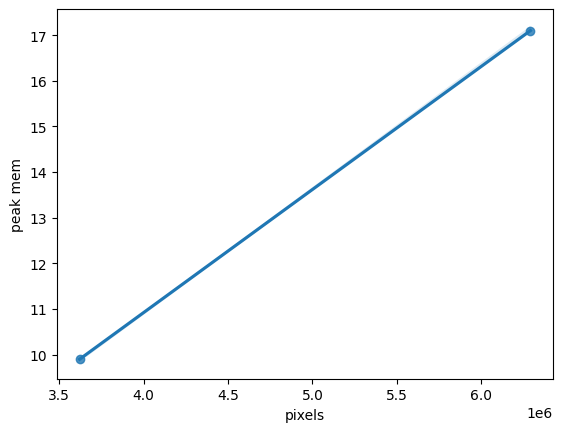

In [ ]:
data = {"pixels": [2048*1768, 3072*2048], "peak mem": [9.9, 17.1]}
import pandas as pd
import scipy
df = pd.DataFrame(data)
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.regplot(x="pixels", y="peak mem", data=df)

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#display slope and intercept of regression equation
intercept + slope*(4096*3536)

In [46]:
intercept + slope*(4096*3536)

39.18588957055213